In [1]:
import json
import glob, pickle

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
with open('./train_lima_test_montreal.pk', 'rb') as in_file:
    dfs_train_lima = pickle.load(in_file)

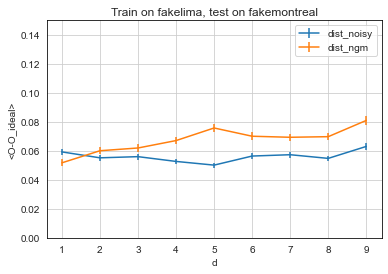

In [60]:
plt.style.use({'figure.facecolor':'white'})

N = 400

y_noisy_train = []
y_noisy_train_err = []
y_ngm_train = []
y_ngm_train_err = []
for depth in dfs_train_lima.keys():
    y_noisy_train.append(dfs_train_lima[depth]['dist_noisy'].mean())
    y_noisy_train_err.append(dfs_train_lima[depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_train.append(dfs_train_lima[depth]['dist_ngm'].mean())
    y_ngm_train_err.append(dfs_train_lima[depth]['dist_ngm'].std() / np.sqrt(N))

plt.errorbar(np.arange(1, 10), y_noisy_train, y_noisy_train_err, label='dist_noisy')
plt.errorbar(np.arange(1, 10), y_ngm_train, y_ngm_train_err,  label='dist_ngm')
plt.ylim([0, 0.15])
plt.title('Train on fakelima, test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()
plt.show()

In [25]:
dfs_all_finetune = {}
for n_samples in [1, 2, 5, 10, 20, 50, 100, 200, 300, 400]:
    with open(f'./train_lima_finetune_montreal_test_montreal_{n_samples}.pk', 'rb') as in_file:
        dfs_all_finetune[n_samples] = pickle.load(in_file)

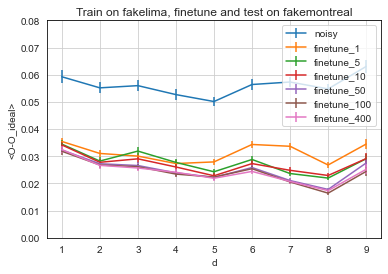

In [26]:
plt.style.use({'figure.facecolor':'white'})

n_samples = 1

y_noisy_ft = []
y_ngm_ft = []
y_noisy_ft_err = []
y_ngm_ft_err = []
for depth in range(1, 10):
    y_noisy_ft.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].mean())
    y_noisy_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_ft.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].mean())
    y_ngm_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].std() / np.sqrt(N))

plt.errorbar(np.arange(1, 10), y_noisy_ft, y_noisy_ft_err, label='noisy')
plt.errorbar(np.arange(1, 10), y_ngm_ft, y_ngm_ft_err, label=f'finetune_{n_samples}')
plt.ylim([0, 0.08])
plt.title('Train on fakelima, finetune and test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()

for n_samples in [5, 10, 50, 100, 400]:
    y_noisy_ft = []
    y_ngm_ft = []
    y_noisy_ft_err = []
    y_ngm_ft_err = []
    for depth in range(1, 10):
        y_noisy_ft.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].mean())
        y_noisy_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].std() / np.sqrt(N))
        y_ngm_ft.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].mean())
        y_ngm_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].std() / np.sqrt(N))

    plt.errorbar(np.arange(1, 10), y_ngm_ft, y_ngm_ft_err, label=f'finetune_{n_samples}')
    plt.ylim([0, 0.08])
    plt.title('Train on fakelima, finetune and test on fakemontreal')
    plt.ylabel('<O-O_ideal>')
    plt.xlabel('d')
    plt.legend()

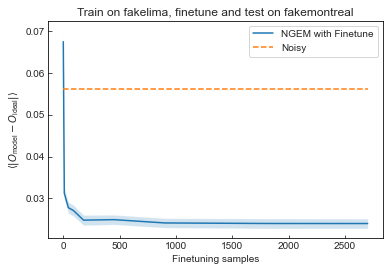

In [61]:
import matplotlib
matplotlib.rc('axes',edgecolor='black')

fig = plt.figure()

x = [0, 1, 5, 10, 20, 50, 100, 200, 300]
y = []
yerr = []
at_depths_noisy = []
at_depths_ngm = []
for depth in range(1, 10):
    at_depths_noisy += dfs_train_lima[depth]['dist_noisy'].tolist()
    at_depths_ngm += dfs_train_lima[depth]['dist_ngm'].tolist()
y.append(np.mean(at_depths_ngm))
y_noisy = np.mean(at_depths_noisy)
yerr.append(np.std(at_depths_ngm) / np.sqrt(N))
yerr_noisy = np.std(at_depths_noisy) / np.sqrt(N)

for n_samples in x[1:]:
    at_depths_ngm = []
    for depth in range(1, 10):
        at_depths_ngm += dfs_all_finetune[n_samples][depth]['dist_ngm'].tolist()
    y.append(np.mean(at_depths_ngm))
    yerr.append(np.std(at_depths_ngm) / np.sqrt(N))

x = np.array(x) * 9
y = np.array(y)
yerr = np.array(yerr)
plt.plot(x, y, label='NGEM with Finetune')
plt.fill_between(x, y-yerr, y+yerr, alpha=0.2)
plt.hlines(y_noisy, xmin=x[0], xmax=x[-1], linestyles='dashed', colors='C1', label='Noisy')
# plt.ylim([0, 0.08])
plt.title('Train on fakelima, finetune and test on fakemontreal')
plt.ylabel(r'$\langle|O_{\mathregular{model}}-O_{\mathregular{ideal}}|\rangle$')
plt.xlabel('Finetuning samples')
plt.legend()
ax = plt.gca()
ax.grid(False)
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
ax.tick_params(axis='y',direction='in')
ax.tick_params(axis='x',direction='in')
plt.show()

# fig.savefig('./finetune_plot_b.pdf', format='pdf', dpi=300)

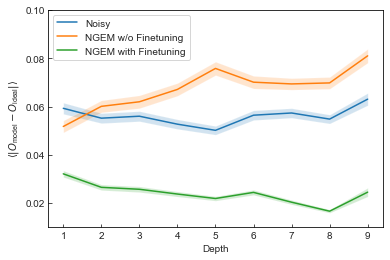

In [56]:
import matplotlib
matplotlib.rc('axes',edgecolor='black')

n_samples = 300

y_noisy_ft = []
y_ngm_ft = []
y_noisy_ft_err = []
y_ngm_ft_err = []
for depth in range(1, 10):
    y_noisy_ft.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].mean())
    y_noisy_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_ft.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].mean())
    y_ngm_ft_err.append(dfs_all_finetune[n_samples][depth]['dist_ngm'].std() / np.sqrt(N))

fig = plt.figure()

x = np.arange(1, 10)
y_noisy_ft = np.array(y_noisy_ft)
y_noisy_ft_err = np.array(y_noisy_ft_err)
y_ngm_train = np.array(y_ngm_train)
y_ngm_train_err = np.array(y_ngm_train_err)
y_ngm_ft = np.array(y_ngm_ft)
y_ngm_ft_err = np.array(y_ngm_ft_err)

alpha = 0.2

plt.plot(x, y_noisy_ft, label='Noisy')
plt.fill_between(x, y_noisy_ft-y_noisy_ft_err, y_noisy_ft+y_noisy_ft_err, alpha=alpha)
plt.plot(x, y_ngm_train, label='NGEM w/o Finetuning')
plt.fill_between(x, y_ngm_train-y_ngm_train_err, y_ngm_train+y_ngm_train_err, alpha=alpha)
plt.plot(x, y_ngm_ft, label='NGEM with Finetuning')
plt.fill_between(x, y_ngm_ft-y_ngm_ft_err, y_ngm_ft+y_ngm_ft_err, alpha=alpha)
plt.ylim([0.01, 0.1])
plt.ylabel(r'$\langle|O_{\mathregular{model}}-O_{\mathregular{ideal}}|\rangle$')
plt.xlabel('Depth')
ax = plt.gca()
ax.grid(False)
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
ax.tick_params(axis='y',direction='in')
ax.tick_params(axis='x',direction='in')
plt.legend()
plt.show()

fig.savefig('./finetune_plot_a.pdf', format='pdf', dpi=300)